In [1]:
import os
from os import path

import json

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
meta_dict = {}

for folder in os.listdir():
    if path.isdir(folder) and folder not in ['.ipynb_checkpoints', 'all_features']:
        for file in os.listdir(path.join(folder, 'original_files')):
            if file.rsplit(".")[-1] == 'json':
                with open(path.join(folder, 'original_files', file)) as json_file:
                    meta_dict[file.rsplit(".")[0]] = (json.load(json_file))
               

In [3]:
df = pd.read_pickle('dataframe_dropped.pkl')

In [4]:
df.sample(1)

,convex_area,euler_number,extent,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-2,inertia_tensor-2-2,local_centroid-0,max_intensity-0,max_intensity-1,...,hc_foci_d_nearest_neighbor_mean,hc_foci_d_nearest_neighbor_variance,hc_foci_ratio_nearest_neighbor_volume_mean,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count,full_label,condition
1965,119726.0,1.0,0.480881,34.661588,-3.739698,32.226718,692.003647,7.103124,255.0,255.0,...,1.920272,1.275965,77.981106,1587.437049,1.192912,1.48268,0.099409,0.123557,JC_Plate1_tnfa_high_60_nucleus_2,tnfa_high


In [5]:
def add_meta_data(row):
    filename = '_'.join(row.full_label.rsplit('_')[:-2])
    spy, spx = meta_dict[filename]['StagePosY'], meta_dict[filename]['StagePosX']
    row['StagePosX'] = np.float64(spx)
    row['StagePosY'] = np.float64(spy)
    return(row)


In [6]:
df = df.apply(add_meta_data, axis=1)

In [7]:
df.StagePosX

0       0.073996
1       0.073996
2       0.072552
3       0.072552
4       0.072552
          ...   
2133    0.049677
2134    0.048445
2135    0.048445
2136    0.048445
2137    0.049247
Name: StagePosX, Length: 2138, dtype: float64

In [8]:
df.sample(1)

,convex_area,euler_number,extent,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-2,inertia_tensor-2-2,local_centroid-0,max_intensity-0,max_intensity-1,...,hc_foci_ratio_nearest_neighbor_volume_mean,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count,full_label,condition,StagePosX,StagePosY
1803,72670.0,1.0,0.435282,-14.901488,-10.060858,-59.523048,470.675176,7.057654,255.0,255.0,...,19.817275,179.215928,0.821332,0.454471,0.054755,0.030298,JC_Plate1_both_low_13_nucleus_3,both_low,0.099818,0.012015


In [9]:
df.groupby('condition').describe()

convex_area                                                          \
                count          mean           std      min       25%      50%   
condition                                                                       
BSA_good        283.0  94765.547703  24097.982943  44879.0  78031.00  90287.0   
Control         260.0  87473.419231  23168.313343  40283.0  72111.25  84565.0   
MCP_low         259.0  86376.247104  24938.475116  38226.0  67852.00  79707.0   
TNFa_low        190.0  91200.252632  25768.081031  41149.0  72526.50  86932.5   
both_high       261.0  92367.727969  25863.901875  42149.0  73814.00  85166.0   
both_low        263.0  96371.874525  25787.937414  46112.0  76088.00  92631.0   
mcp_high        314.0  90795.133758  24243.494463  44686.0  72543.25  86598.5   
tnfa_high       308.0  89094.886364  22722.971154  48481.0  72200.50  85779.5   

                               euler_number            ... StagePosX  \
                 75%       max        count      mean  ...       75%   
condition                                              ...             
BSA_good   110660.00  151629.0        283.0  0.501767  ...  0.025856   
Control    100848.75  153333.0        260.0  0.596154  ...  0.030900   
MCP_low    104550.50  149043.0        259.0  0.799228  ...  0.074395   
TNFa_low   111289.25  149401.0        190.0  0.642105  ...  0.051009   
both_high  111142.00  152455.0        261.0  0.727969  ...  0.103941   
both_low   118290.50  151831.0        263.0  0.730038  ...  0.100326   
mcp_high   108079.25  162762.0        314.0  0.812102  ...  0.076215   
tnfa_high  106878.25  148928.0        308.0  0.860390  ...  0.050363   

                    StagePosY                                          \
                max     count      mean       std       min       25%   
condition                                                               
BSA_good   0.027680     283.0  0.015691  0.001325  0.013714  0.014489   
Control    0.031915     260.0  0.035737  0.001185  0.034286  0.034529   
MCP_low    0.075110     259.0  0.016828  0.000956  0.015140  0.015811   
TNFa_low   0.051874     190.0  0.014733  0.000910  0.013230  0.014064   
both_high  0.104636     261.0  0.037969  0.001173  0.036209  0.037033   
both_low   0.100942     263.0  0.013119  0.000852  0.011645  0.012383   
mcp_high   0.077272     314.0  0.039161  0.000914  0.037057  0.038529   
tnfa_high  0.051736     308.0  0.040790  0.001070  0.038855  0.039859   

                                         
                50%       75%       max  
condition                                
BSA_good   0.015640  0.016843  0.017884  
Control    0.035535  0.036866  0.037890  
MCP_low    0.017022  0.017630  0.018356  
TNFa_low   0.014578  0.015481  0.016908  
both_high  0.037948  0.038803  0.040271  
both_low   0.013137  0.013794  0.014776  
mcp_high   0.039232  0.039872  0.040577  
tnfa_high  0.040791  0.041652  0.042865  

[8 rows x 1384 columns]

In [10]:
def assign_bins(group):
    x_bins = pd.qcut(group['StagePosX'], q=3, labels=[1, 2, 3])
    y_bins = pd.qcut(group['StagePosY'], q=3, labels=[1, 2, 3])
    group['position'] = (x_bins.astype(str) + '-' + y_bins.astype(str)).astype(str)
    return group

df = df.groupby('condition').apply(assign_bins).reset_index(drop=True)

df.sample(10)

/tmp/ipykernel_51298/3768397341.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  group['position'] = (x_bins.astype(str) + '-' + y_bins.astype(str)).astype(str)
/tmp/ipykernel_51298/3768397341.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  group['position'] = (x_bins.astype(str) + '-' + y_bins.astype(str)).astype(str)
/tmp/ipykernel_51298/3768397341.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

,convex_area,euler_number,extent,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-2,inertia_tensor-2-2,local_centroid-0,max_intensity-0,max_intensity-1,...,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count,full_label,condition,StagePosX,StagePosY,position
1315,82009.0,1.0,0.451560,14.626645,-4.913293,-18.002361,485.225053,6.066951,255.0,255.0,...,18.900147,0.550352,0.315420,0.020383,0.011682,JC_Plate1_both_low_22_nucleus_2,both_low,0.100145,0.012266,2-1
527,120861.0,1.0,0.517286,6.296060,-13.556740,-113.089767,648.091568,7.566232,255.0,255.0,...,117.552601,0.835157,0.765888,0.029827,0.027353,JC_Plate1_Control_13_nucleus_1,Control,0.029025,0.034286,1-1
1458,111065.0,1.0,0.497533,-9.035632,4.507193,-40.041619,699.404580,8.378065,255.0,255.0,...,215.944391,0.871698,0.600744,0.045879,0.031618,JC_Plate1_both_low_83_nucleus_1,both_low,0.100176,0.013498,3-2
339,108442.0,1.0,0.468455,-16.415857,20.443732,-5.564058,689.505291,7.764814,255.0,255.0,...,187.114398,0.902714,0.337017,0.045136,0.016851,JC_Plate1_Control_27_nucleus_1,Control,0.028946,0.034576,1-1
239,95139.0,1.0,0.506866,-9.218414,0.945092,-17.138346,591.463101,7.105162,255.0,255.0,...,44.523476,0.597489,0.429726,0.022129,0.015916,JC_Plate1_BSA_good_99_nucleus_2,BSA_good,0.024390,0.016864,1-3
1355,122530.0,1.0,0.483589,-19.577250,5.578947,-13.696970,628.523868,7.562121,255.0,255.0,...,42.314312,0.667860,0.213184,0.023852,0.007614,JC_Plate1_both_low_42_nucleus_2,both_low,0.100297,0.012651,3-2
559,70499.0,1.0,0.494412,2.677459,0.926689,-100.729112,438.754698,6.880344,255.0,255.0,...,75.017564,0.399293,0.166259,0.024956,0.010391,JC_Plate1_MCP_low_89_nucleus_1,MCP_low,0.072982,0.017594,1-3
734,70304.0,1.0,0.527290,-4.591590,-7.228243,61.096551,451.358872,6.139585,255.0,255.0,...,135.431934,0.634490,0.316214,0.039656,0.019763,JC_Plate1_MCP_low_73_nucleus_1,MCP_low,0.072741,0.017249,1-2
1197,128668.0,1.0,0.441503,1.385852,20.421221,102.276757,658.169702,7.986144,255.0,255.0,...,11.284928,0.769068,0.568405,0.019227,0.014210,JC_Plate1_both_high_42_nucleus_2,both_high,0.104382,0.037305,3-2
1796,81351.0,1.0,0.516014,-4.735466,-7.775655,29.786950,529.628540,6.140800,255.0,255.0,...,147.680983,0.850215,0.828403,0.040486,0.039448,JC_Plate1_mcp_high_114_nucleus_1,mcp_high,0.076685,0.040333,3-3


In [11]:
grouped = df.groupby('condition')

grouped.describe()

convex_area                                                          \
                count          mean           std      min       25%      50%   
condition                                                                       
BSA_good        283.0  94765.547703  24097.982943  44879.0  78031.00  90287.0   
Control         260.0  87473.419231  23168.313343  40283.0  72111.25  84565.0   
MCP_low         259.0  86376.247104  24938.475116  38226.0  67852.00  79707.0   
TNFa_low        190.0  91200.252632  25768.081031  41149.0  72526.50  86932.5   
both_high       261.0  92367.727969  25863.901875  42149.0  73814.00  85166.0   
both_low        263.0  96371.874525  25787.937414  46112.0  76088.00  92631.0   
mcp_high        314.0  90795.133758  24243.494463  44686.0  72543.25  86598.5   
tnfa_high       308.0  89094.886364  22722.971154  48481.0  72200.50  85779.5   

                               euler_number            ... StagePosX  \
                 75%       max        count      mean  ...       75%   
condition                                              ...             
BSA_good   110660.00  151629.0        283.0  0.501767  ...  0.025856   
Control    100848.75  153333.0        260.0  0.596154  ...  0.030900   
MCP_low    104550.50  149043.0        259.0  0.799228  ...  0.074395   
TNFa_low   111289.25  149401.0        190.0  0.642105  ...  0.051009   
both_high  111142.00  152455.0        261.0  0.727969  ...  0.103941   
both_low   118290.50  151831.0        263.0  0.730038  ...  0.100326   
mcp_high   108079.25  162762.0        314.0  0.812102  ...  0.076215   
tnfa_high  106878.25  148928.0        308.0  0.860390  ...  0.050363   

                    StagePosY                                          \
                max     count      mean       std       min       25%   
condition                                                               
BSA_good   0.027680     283.0  0.015691  0.001325  0.013714  0.014489   
Control    0.031915     260.0  0.035737  0.001185  0.034286  0.034529   
MCP_low    0.075110     259.0  0.016828  0.000956  0.015140  0.015811   
TNFa_low   0.051874     190.0  0.014733  0.000910  0.013230  0.014064   
both_high  0.104636     261.0  0.037969  0.001173  0.036209  0.037033   
both_low   0.100942     263.0  0.013119  0.000852  0.011645  0.012383   
mcp_high   0.077272     314.0  0.039161  0.000914  0.037057  0.038529   
tnfa_high  0.051736     308.0  0.040790  0.001070  0.038855  0.039859   

                                         
                50%       75%       max  
condition                                
BSA_good   0.015640  0.016843  0.017884  
Control    0.035535  0.036866  0.037890  
MCP_low    0.017022  0.017630  0.018356  
TNFa_low   0.014578  0.015481  0.016908  
both_high  0.037948  0.038803  0.040271  
both_low   0.013137  0.013794  0.014776  
mcp_high   0.039232  0.039872  0.040577  
tnfa_high  0.040791  0.041652  0.042865  

[8 rows x 1384 columns]

In [12]:
first_group_key = list(grouped.groups.keys())[0]
first_group = grouped.get_group(first_group_key)

first_group.sample(10)

,convex_area,euler_number,extent,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-2,inertia_tensor-2-2,local_centroid-0,max_intensity-0,max_intensity-1,...,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count,full_label,condition,StagePosX,StagePosY,position
206,125434.0,-6.0,0.436525,2.889620,-7.065255,83.791412,740.015953,7.835983,255.0,255.0,...,36221.857361,1.038794,0.233201,0.173132,0.038867,JC_Plate1_BSA_good_113_nucleus_1,BSA_good,0.026951,0.017525,3-3
133,104388.0,1.0,0.452617,-0.528858,-9.774908,-89.195548,847.642036,7.503991,255.0,255.0,...,7.046220,0.467485,0.220278,0.011402,0.005373,JC_Plate1_BSA_good_94_nucleus_2,BSA_good,0.026291,0.016615,3-3
224,135125.0,0.0,0.482557,7.899008,-12.879597,14.549501,818.961131,7.750097,255.0,255.0,...,23.120389,0.640318,0.272784,0.017306,0.007373,JC_Plate1_BSA_good_34_nucleus_3,BSA_good,0.024751,0.014556,1-1
45,86773.0,1.0,0.494239,-3.129042,-7.709858,-105.868368,551.345287,6.967385,255.0,255.0,...,28.046165,0.724359,0.516157,0.030182,0.021507,JC_Plate1_BSA_good_104_nucleus_2,BSA_good,0.026645,0.017180,3-3
28,146016.0,1.0,0.500117,6.646688,-0.311362,0.794218,780.622548,7.599072,255.0,255.0,...,19.484204,0.740440,0.349116,0.018511,0.008728,JC_Plate1_BSA_good_29_nucleus_2,BSA_good,0.025214,0.014476,2-1
146,49809.0,1.0,0.451308,0.905760,-12.003031,58.565045,311.456121,4.831778,255.0,255.0,...,144.616772,0.515821,0.112070,0.042985,0.009339,JC_Plate1_BSA_good_95_nucleus_7,BSA_good,0.027162,0.016672,3-3
260,99136.0,-6.0,0.428284,14.546396,-9.811401,143.013712,635.252153,7.149369,255.0,255.0,...,43.334793,0.624213,0.220074,0.026009,0.009170,JC_Plate1_BSA_good_71_nucleus_1,BSA_good,0.025112,0.015875,2-2
276,69646.0,1.0,0.435549,-1.768250,-9.651165,-154.759460,673.175394,5.257593,255.0,255.0,...,17.132524,0.375485,0.177725,0.014442,0.006836,JC_Plate1_BSA_good_98_nucleus_2,BSA_good,0.025883,0.016838,3-3
275,57222.0,1.0,0.480722,2.364757,3.186800,17.190863,401.257388,5.562153,255.0,255.0,...,1322.396868,0.638400,0.167685,0.091200,0.023955,JC_Plate1_BSA_good_98_nucleus_1,BSA_good,0.025883,0.016838,3-3
23,107798.0,1.0,0.454846,32.844662,9.877625,-64.647157,581.341080,8.242524,255.0,255.0,...,403.713772,1.295704,1.654806,0.076218,0.097342,JC_Plate1_BSA_good_61_nucleus_3,BSA_good,0.026709,0.015252,3-2


In [13]:
df.to_pickle('dataframe_position.pkl')

<h4> Cluster analysis </h4>

In [14]:
df = pd.read_pickle('dataframe_position.pkl')
df.sample(1)

,convex_area,euler_number,extent,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-2,inertia_tensor-2-2,local_centroid-0,max_intensity-0,max_intensity-1,...,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count,full_label,condition,StagePosX,StagePosY,position
7,108798.0,1.0,0.477217,-21.904924,-18.348149,-88.275307,535.780035,8.968138,255.0,255.0,...,234.703675,0.527598,0.738216,0.02638,0.036911,JC_Plate1_BSA_good_65_nucleus_1,BSA_good,0.02486,0.01564,2-2


In [15]:
from sklearn.preprocessing import StandardScaler

positions = df['position']
conditions = df['condition']

columns = [col for col in df.columns if ('full_label' not in col and 'condition' not in col and 'StagePosX' not in col and 'StagePosY' not in col and 'position' not in col)]

scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[columns]), columns=columns)

In [16]:
from sklearn.manifold import TSNE

# Create and fit t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_representation = tsne.fit_transform(df_normalized)

# Create DataFrame from t-SNE-transformed data
transformed_data = pd.DataFrame(tsne_representation, columns=['Component 1', 'Component 2'])


In [17]:
transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), conditions.reset_index(drop=True)], axis=1, ignore_index=False)
transformed_data_labeled

,Component 1,Component 2,condition
0,22.177780,26.487314,BSA_good
1,-1.166049,30.727753,BSA_good
2,-10.739321,-3.332122,BSA_good
3,7.815750,10.572560,BSA_good
4,12.548285,-23.514763,BSA_good
...,...,...,...
2133,12.087173,22.780703,tnfa_high
2134,-0.223655,-57.376736,tnfa_high
2135,-6.592481,-53.631920,tnfa_high
2136,6.580225,4.481876,tnfa_high


In [18]:
shuffled_df = transformed_data_labeled.sample(frac=1).reset_index(drop=True)

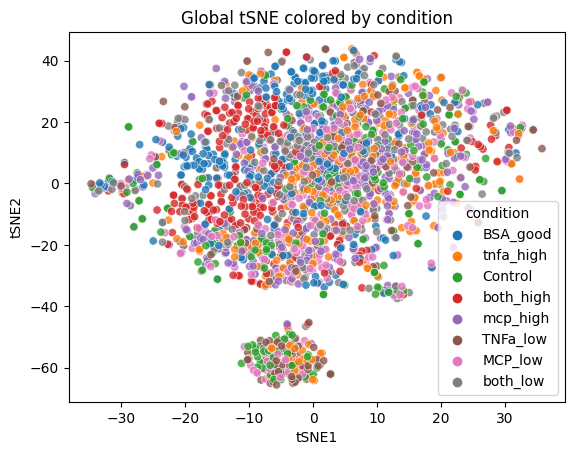

In [19]:
sns.scatterplot(data = shuffled_df, x = 'Component 1', y = 'Component 2', hue='condition', alpha=0.8)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.title('Global tSNE colored by condition')
plt.show()

In [20]:
transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), positions.reset_index(drop=True)], axis=1, ignore_index=False)
transformed_data_labeled

,Component 1,Component 2,position
0,22.177780,26.487314,3-2
1,-1.166049,30.727753,3-2
2,-10.739321,-3.332122,3-3
3,7.815750,10.572560,3-3
4,12.548285,-23.514763,1-3
...,...,...,...
2133,12.087173,22.780703,2-2
2134,-0.223655,-57.376736,1-2
2135,-6.592481,-53.631920,1-2
2136,6.580225,4.481876,1-2


In [21]:
shuffled_df = transformed_data_labeled.sample(frac=1).reset_index(drop=True)


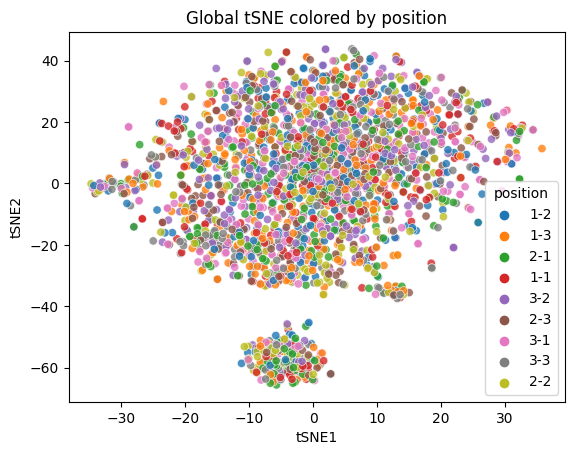

In [22]:
sns.scatterplot(data = shuffled_df, x = 'Component 1', y = 'Component 2', hue='position',alpha=0.8)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.title('Global tSNE colored by position')
plt.show()

<h5> only for control </h5>

In [23]:
bsa_good = df.groupby('condition').get_group('BSA_good')

In [24]:
positions = bsa_good['position']
conditions = bsa_good['condition']

columns = [col for col in bsa_good.columns if ('full_label' not in col and 'condition' not in col and 'StagePosX' not in col and 'StagePosY' not in col and 'position' not in col)]

scaler = StandardScaler()
bsa_good_normalized = pd.DataFrame(scaler.fit_transform(bsa_good[columns]), columns=columns)

In [25]:
tsne = TSNE(n_components=2, random_state=42)
tsne_representation = tsne.fit_transform(bsa_good_normalized)

transformed_data = pd.DataFrame(tsne_representation, columns=['Component 1', 'Component 2'])

In [26]:
transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), positions.reset_index(drop=True)], axis=1, ignore_index=False)
transformed_data_labeled

,Component 1,Component 2,position
0,3.210135,-3.296927,3-2
1,6.930984,-1.941702,3-2
2,-2.551791,0.078850,3-3
3,1.043167,-4.659869,3-3
4,-3.773278,7.730546,1-3
...,...,...,...
278,1.507504,3.914147,2-3
279,3.581769,-5.706296,2-3
280,1.720491,6.371539,2-2
281,2.098692,-2.104041,2-2


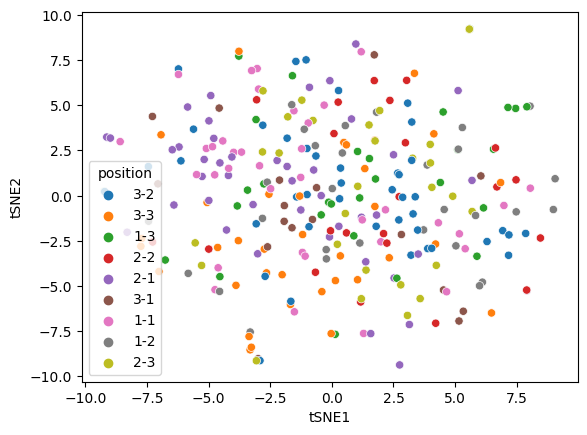

In [27]:
sns.scatterplot(data = transformed_data_labeled, x = 'Component 1', y = 'Component 2', hue='position')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.show()

In [28]:
def plot_cluster_check_for_condition(df):
    from sklearn.preprocessing import StandardScaler
    from sklearn.manifold import TSNE
    df = df.groupby('condition')
    dfs = {}
    for condition in df.groups.keys():
        df_condition = df.get_group(condition)
        
        positions = df_condition['position']
        conditions = df_condition['condition']
        full_labels = df_condition['full_label']
        
        columns = [col for col in df_condition.columns if ('full_label' not in col and 'condition' not in col and 'StagePosX' not in col and 'StagePosY' not in col and 'position' not in col)]
        
        scaler = StandardScaler()
        df_condition_normalized = pd.DataFrame(scaler.fit_transform(df_condition[columns]), columns=columns)

        tsne = TSNE(n_components=2, random_state=42)
        tsne_representation = tsne.fit_transform(df_condition_normalized)
        transformed_data = pd.DataFrame(tsne_representation, columns=['Component 1', 'Component 2'])

        transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), positions.reset_index(drop=True), full_labels.reset_index(drop=True)], axis=1, ignore_index=False)
        sns.scatterplot(data = transformed_data_labeled, x = 'Component 1', y = 'Component 2', hue='position')
        plt.xlabel('tSNE1')
        plt.ylabel('tSNE2')
        plt.title(condition)
        plt.show()
        dfs.update({condition:transformed_data_labeled})
    return(dfs)
    

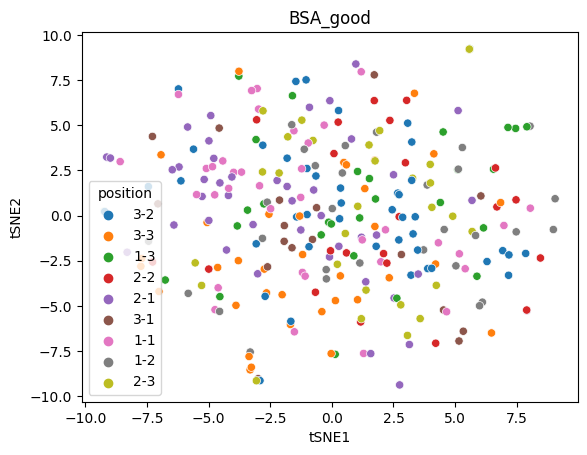

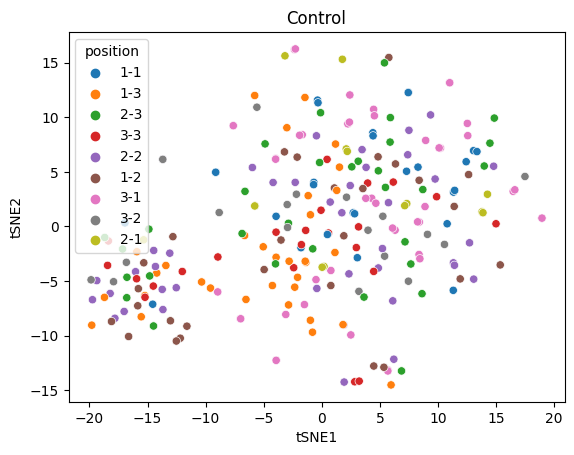

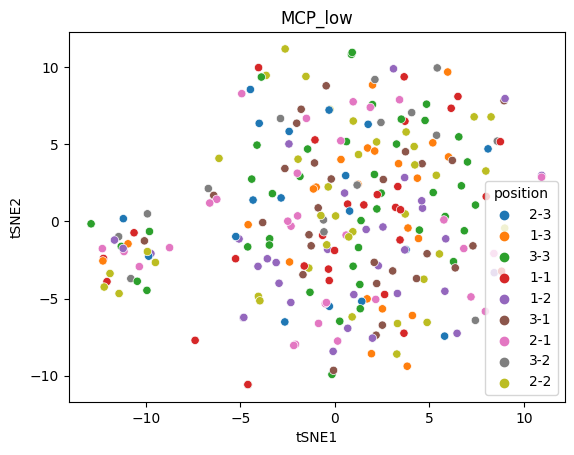

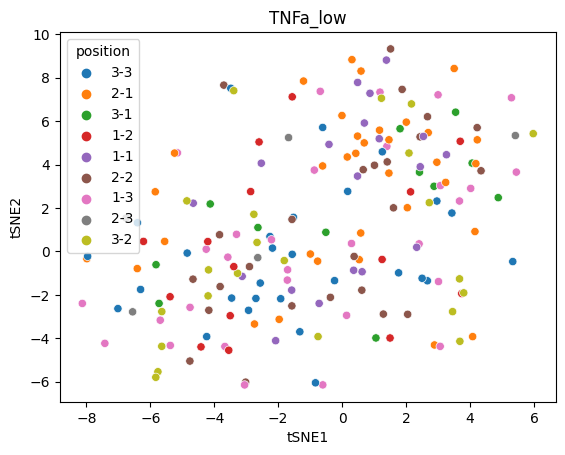

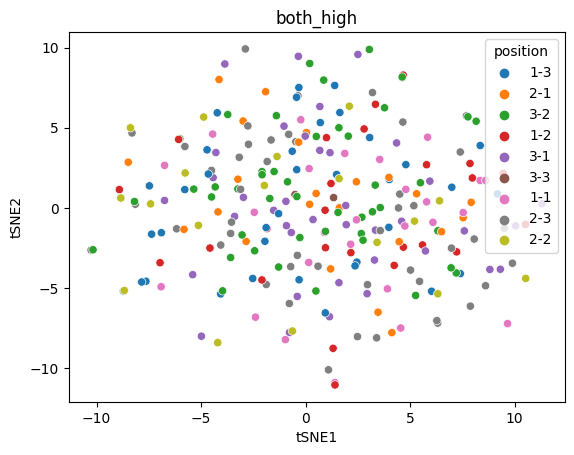

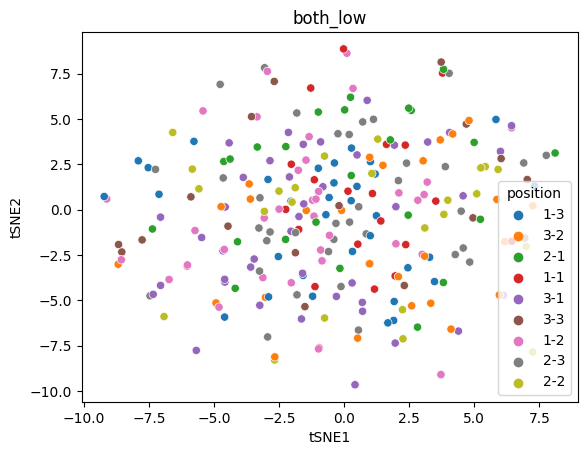

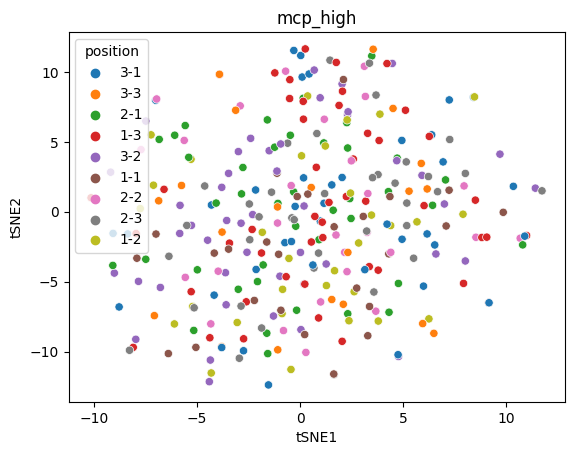

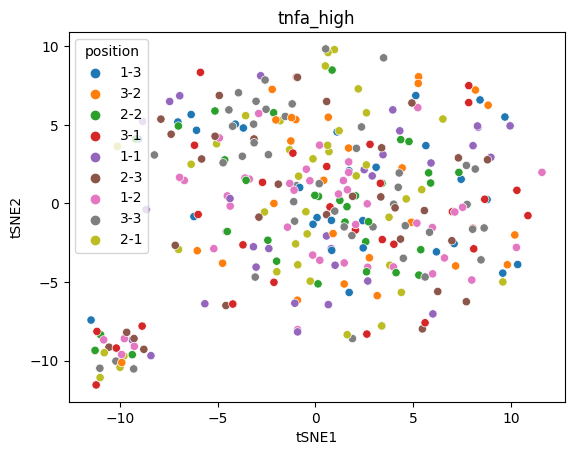

In [29]:
df = pd.read_pickle('dataframe_position.pkl')
dfs = plot_cluster_check_for_condition(df)

In [30]:
import pickle

with open('dfs_condition.pickle', 'wb') as handle:
    pickle.dump(dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)



<h5>PCA</h5>

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_normalized)
principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_
transformed_data = pd.DataFrame(pca.transform(df_normalized))

In [32]:
transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), df['condition'].reset_index()], axis=1, ignore_index=False)
transformed_data_labeled

,0,1,2,3,4,5,6,7,8,9,...,163,164,165,166,167,168,169,170,index,condition
0,-0.438843,3.586767,-1.334873,-0.345362,-0.150372,0.208539,1.691259,1.035761,-0.714457,1.673304,...,1.187969e-16,1.671396e-16,-3.559118e-16,-1.953533e-18,5.682531e-16,-1.194166e-16,1.025185e-16,-7.912159e-17,0,BSA_good
1,-1.514191,2.872471,-4.751885,-1.077462,-0.357490,0.132812,0.012985,-0.117150,1.087174,0.448342,...,2.100660e-16,1.085329e-16,-2.715099e-16,-1.177717e-16,-1.209848e-16,-5.155976e-16,3.107565e-17,-1.671577e-16,1,BSA_good
2,0.008319,-0.451685,0.872594,-1.036483,-0.423046,0.669753,-1.314464,-1.851318,0.891954,1.979384,...,5.230727e-16,-1.704318e-16,9.966763e-17,9.324348e-17,-1.462713e-16,4.529276e-16,1.430808e-17,1.226366e-16,2,BSA_good
3,-0.574503,0.865781,-0.565794,0.428844,-0.929018,0.511846,0.544151,-0.283244,-1.421667,-0.351361,...,-5.556342e-16,1.982556e-16,-2.424757e-16,9.285513e-17,-3.018021e-17,4.731156e-16,-1.968667e-16,5.901396e-17,3,BSA_good
4,5.055686,-2.973449,1.001412,1.960156,-0.427457,-2.269353,4.328558,-3.978305,-1.616832,-2.501591,...,-8.234702e-16,4.173902e-16,6.147675e-16,2.586731e-16,-1.886884e-16,6.012611e-16,1.847404e-16,-1.218454e-15,4,BSA_good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,-1.941277,2.589836,-0.365436,-0.968871,-1.831950,-0.320885,0.383470,-0.223013,-0.391231,0.871059,...,-7.909549e-16,-1.294850e-16,3.890710e-16,-6.156194e-17,2.455340e-16,-4.378309e-17,-1.552720e-16,-2.909271e-16,2133,tnfa_high
2134,-0.482455,-6.022416,0.790266,2.036462,1.558702,-0.897480,2.155912,1.073076,1.754812,-1.693352,...,-2.238922e-16,3.885568e-16,2.591125e-16,1.952482e-17,2.070389e-18,3.973636e-16,7.802710e-17,-2.690911e-16,2134,tnfa_high
2135,-1.083354,-3.324327,5.071475,0.341436,0.626213,0.035540,1.620532,1.547617,1.659375,0.766118,...,3.294577e-16,-2.979189e-16,3.471322e-16,2.125255e-16,-4.656558e-17,8.976777e-16,1.104154e-16,-9.741733e-16,2135,tnfa_high
2136,-0.752885,-0.439569,1.261681,0.221068,-0.617611,-0.354692,0.545097,-0.300978,-0.173858,0.543136,...,4.092995e-16,-2.407326e-16,1.115341e-15,-1.259601e-16,4.676591e-17,7.506233e-17,4.645496e-17,3.780745e-16,2136,tnfa_high


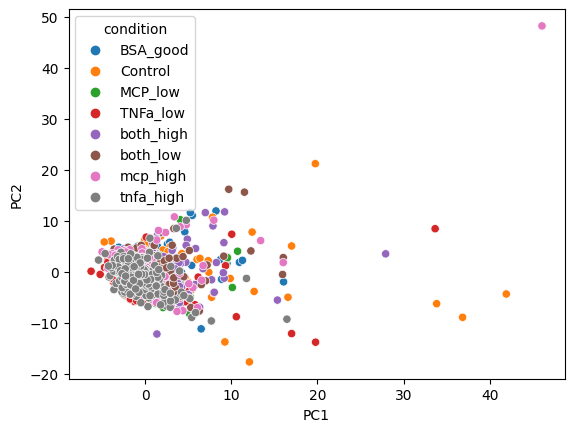

In [33]:
sns.scatterplot(data = transformed_data_labeled, x = 0, y = 1, hue='condition')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()